**This notebook calculates the correlation between Covid 7-day incidence (as reported on 16th Dec 2020) in the German Landkreise (districts) and the 2017 voting outcome of the right-wing party AfD in the Bundestag (state parliament).**

Sources: 
https://www.regionalstatistik.de/genesis//online?operation=table&code=14111-01-03-4&bypass=true&levelindex=0&levelid=1608119964109#abreadcrumb
https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Fallzahlen_Kum_Tab.html on 16/12/2020
        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
landkreise = pd.read_csv("regionalstatistik_btw17_landkreise.csv", header=2, index_col=0)
landkreise.rename(columns={'Unnamed: 2': 'Zweitstimmen_gesamt', 'Unnamed: 3': 'Wahlbeteiligung'}, inplace=True)

covidcases = pd.read_csv("fallzahlen_161220.csv", header=3, dtype=str)
covidcases = covidcases.set_index('LKNR')
landkreise

,Unnamed: 1,Zweitstimmen_gesamt,Wahlbeteiligung,Unnamed: 4,CDU/CSU,SPD,GRÜNE,FDP,DIE LINKE,AfD,Sonstige Parteien
NaN,NaN,Anzahl,Prozent,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl,Anzahl
DG,Deutschland,61688485,76.2,46515492,15317344,9539381,4158400,4999449,4297270,5878115,2325533
01,Schleswig-Holstein,2266012,76.3,1715641,583135,399505,205471,216844,124678,140362,45646
01001,"Flensburg, Kreisfreie Stadt",70105,70.9,49271,13382,12142,7416,5073,5699,3702,1857
01002,"Kiel, Landeshauptstadt, Kreisfreie Stadt",186988,74.1,137368,35525,33093,23995,15697,14699,9524,4835
...,...,...,...,...,...,...,...,...,...,...,...
"die Partei ""PDS"" und vom 17.07.2005 bis einschließlich",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"15.06.2007 die Partei ""Die Linke."" nachgewiesen.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"© Statistische Ämter des Bundes und der Länder, Deutschland, 2020.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dieses Werk ist lizenziert unter der Datenlizenz Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
covidcases

,Landkreis,Anzahl,Inzidenz
LKNR,,,
05334,StadtRegion Aachen,867,156
07131,LK Ahrweiler,134,103
09771,LK Aichach-Friedberg,164,122
08425,LK Alb-Donau-Kreis,370,188
16077,LK Altenburger Land,418,468
...,...,...,...
09663,SK Würzburg,105,82
09679,LK Würzburg,117,72
08417,LK Zollernalbkreis,340,180


In [4]:
# join the two dataframes on the LKNR column
covidcases = covidcases.join(landkreise[['AfD', 'Zweitstimmen_gesamt']]).dropna()
covidcases

,Landkreis,Anzahl,Inzidenz,AfD,Zweitstimmen_gesamt
01001,SK Flensburg,47,52,3702,70105
01002,SK Kiel,268,109,9524,186988
01003,SK Lübeck,370,171,10461,166673
01004,SK Neumünster,71,89,4124,60378
01051,LK Dithmarschen,86,65,6626,107148
...,...,...,...,...,...
16073,LK Saalfeld-Rudolstadt,275,266,18010,92002
16074,LK Saale-Holzland-Kreis,173,209,12278,68855
16075,LK Saale-Orla-Kreis,309,385,13452,68269
16076,LK Greiz,258,265,16203,84711


In [15]:
plot_data = covidcases[['Inzidenz', 'AfD', 'Zweitstimmen_gesamt', 'Landkreis']]
plot_data[['Inzidenz', 'AfD', 'Zweitstimmen_gesamt']] = plot_data[['Inzidenz', 'AfD', 'Zweitstimmen_gesamt']].astype(float)
plot_data['AfD'] = plot_data['AfD']/plot_data['Zweitstimmen_gesamt']*100
plot_data

C:\Users\Florian\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Florian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Inzidenz,AfD,Zweitstimmen_gesamt,Landkreis
01001,52.0,5.280650,70105.0,SK Flensburg
01002,109.0,5.093375,186988.0,SK Kiel
01003,171.0,6.276361,166673.0,SK Lübeck
01004,89.0,6.830302,60378.0,SK Neumünster
01051,65.0,6.183970,107148.0,LK Dithmarschen
...,...,...,...,...
16073,266.0,19.575661,92002.0,LK Saalfeld-Rudolstadt
16074,209.0,17.831675,68855.0,LK Saale-Holzland-Kreis
16075,385.0,19.704405,68269.0,LK Saale-Orla-Kreis
16076,265.0,19.127386,84711.0,LK Greiz


Pearson-Korrelation: 0.5887439357809356


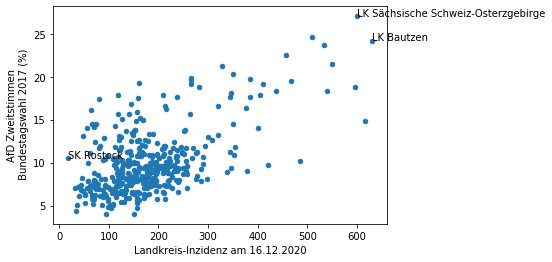

In [17]:
%matplotlib inline
ax = plot_data.plot.scatter('Inzidenz', 'AfD')
plt.xlabel("Landkreis-Inzidenz am 16.12.2020")
plt.ylabel("AfD Zweitstimmen\n Bundestagswahl 2017 (%)")

# label a few interesting points
max_incidence = plot_data.iloc[plot_data['Inzidenz'].argmax()]
max_vote      = plot_data.iloc[plot_data['AfD'].argmax()]
min_incidence = plot_data.iloc[plot_data['Inzidenz'].argmin()]

for point in [max_incidence, max_vote, min_incidence]:
    ax.text(point['Inzidenz'], point['AfD'], point['Landkreis'])

print("Pearson-Korrelation:", plot_data['Inzidenz'].corr(plot_data['AfD']))